In [ ]:
# Resources
# US Census Bureau. (2019). Population Time Series. [Version 63]. 
# Retrieved October 31, 2020 from https://www.kaggle.com/census/population-time-series-data/metadata

In [22]:
## SAMPLE TIME SERIES USING CENSUS DATA

from pandas import Series

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
from math import sqrt
from pandas import DataFrame
from scipy.stats import boxcox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


In [10]:
df = pd.read_csv('/content/POP.csv')
df = df.drop(['realtime_start','realtime_end'],axis=1)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.describe()

,value
count,816.000000
mean,243847.767826
std,50519.140567
min,156309.000000
25%,201725.250000
50%,239557.500000
75%,289364.250000
max,330309.946000


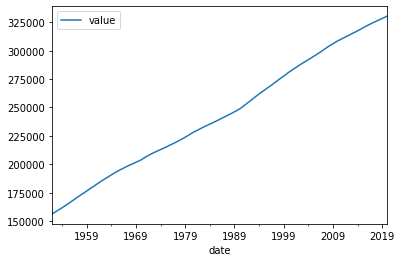

In [13]:
from matplotlib import pyplot

df.plot()
pyplot.show()

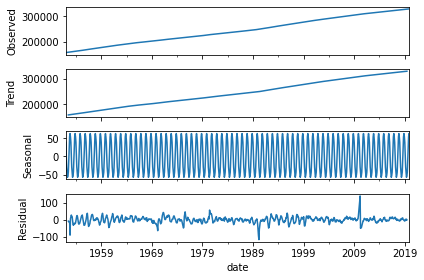

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposed = seasonal_decompose(df['value'])
x = decomposed.plot()


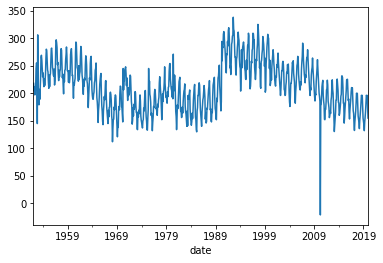

In [19]:
df['stationary'] = df['value'].diff()
df['stationary'].plot()

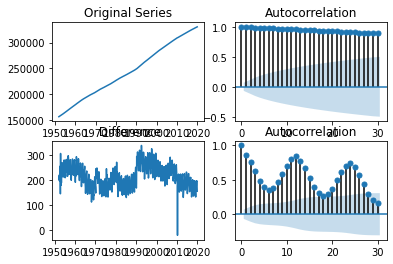

In [24]:
fig,axes = plt.subplots(2,2)

x = axes[0,0].plot(df['value']); axes[0,0].set_title('Original Series')
a = plot_acf(df['value'].values,ax=axes[0,1])

y = axes[1,0].plot(df['value'].diff()); axes[1,0].set_title(' Difference')
b = plot_acf(df['value'].diff().dropna(),ax=axes[1,1])

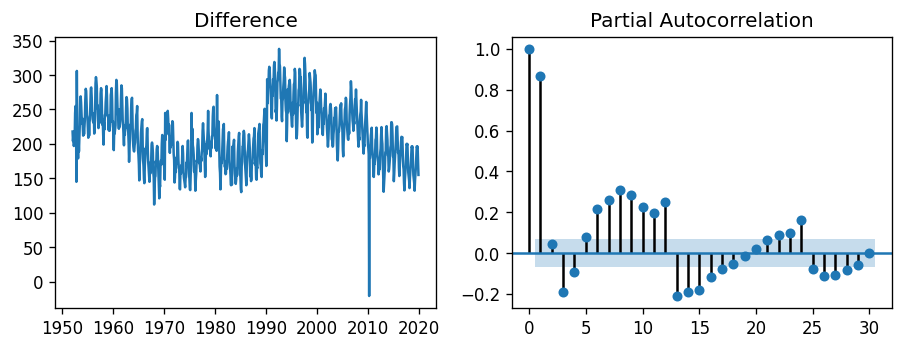

In [25]:
plt.rcParams.update({'figure.figsize':(9,3),'figure.dpi':120})

fig,axes = plt.subplots(1,2)

a = axes[0].plot(df['value'].diff()); axes[0].set_title('Difference')
b = plot_pacf(df['value'].diff().dropna(),ax=axes[1])

plt.show()

In [26]:
model = ARIMA(df['value'].diff().dropna(),(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                  814
Model:                 ARIMA(1, 1, 2)   Log Likelihood               -3651.467
Method:                       css-mle   S.D. of innovations             21.465
Date:                Sat, 31 Oct 2020   AIC                           7312.934
Time:                        15:07:33   BIC                           7336.444
Sample:                    03-01-1952   HQIC                          7321.958
                         - 12-01-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0712      0.135     -0.527      0.598      -0.336       0.194
ar.L1.D.value     0.7105      0.037     19.061      0.000       0.637       0.784
ma.L1.D.value    -0.9259      0.041    -

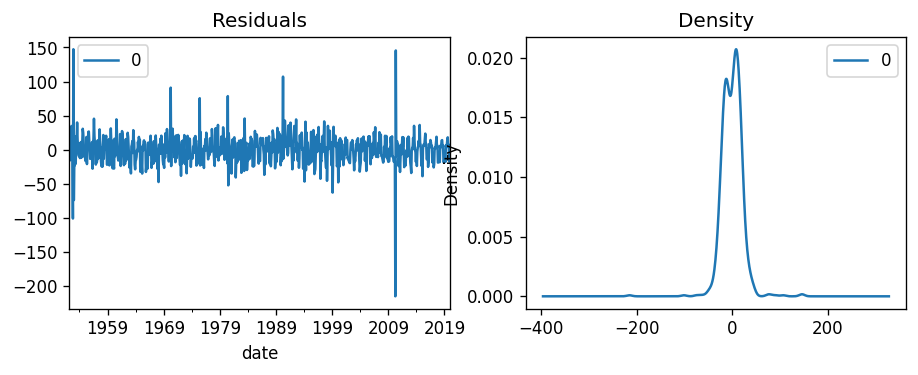

In [27]:
residuals = pd.DataFrame(model_fit.resid)

fig,axes = plt.subplots(1,2)

residuals.plot(title='Residuals',ax= axes[0])
residuals.plot(kind= 'kde', title='Density',ax= axes[1])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


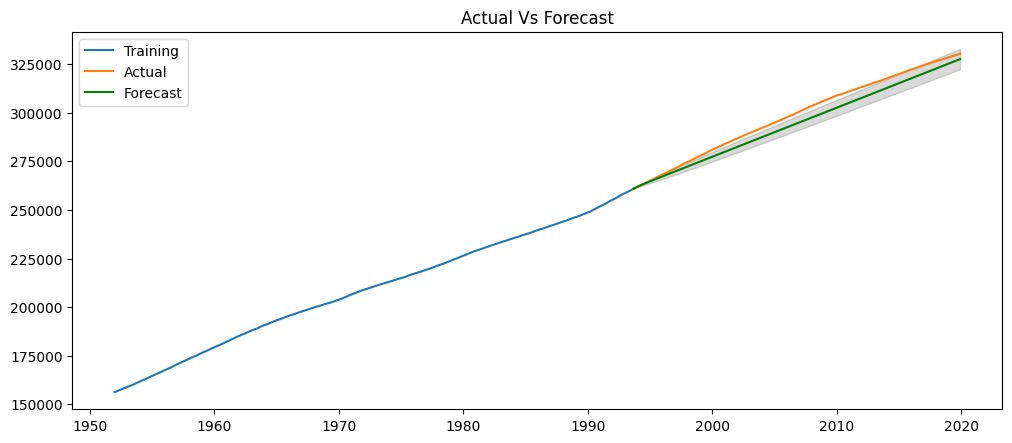

In [29]:
#Train & Test Data
train = df['value'][:500]
test = df['value'][500:]

model1 = ARIMA(train,order=(1,1,2))
model_fitted1 = model1.fit(disp= -1)

fc,se,conf = model_fitted1.forecast(316)

fc_series = Series(fc,index=test.index)
lower_series = Series(conf[:,0],index=test.index)
upper_series = Series(conf[:,1],index=test.index)

plt.figure(figsize=(12,5), dpi=100)

plt.plot(train,label='Training')
plt.plot(test,label='Actual')
plt.plot(fc_series,label='Forecast',color='green')

plt.fill_between(lower_series.index,lower_series,upper_series,color='k',alpha=.15)

plt.title('Actual Vs Forecast')
plt.legend(loc='upper left')

